In [ ]:
#The Link For The Dataset Used In This Model Is Given Below Download This From Google Drive & Then Upload This Dataset To The
# Current Model (use https://colab.research.google.com).By Clicking The Files Option At The Left And Then By Clicking The Upload Button & Then Run Every Block Step By Step.
# The Link "https://drive.google.com/file/d/1nSu3Hhji0YbxZMuliOse-vYMbMmmejvd/view?usp=sharing"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [ ]:
data=pd.read_csv("/content/Instagram.csv",encoding="latin-1")
print(data.head())

data.isnull().sum() # if there is any null value in your dataset remove it by using "data = data.dropna()"(without the quotes)

data.info()


   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

<ipython-input-3-d8c369380280>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["From Home"])


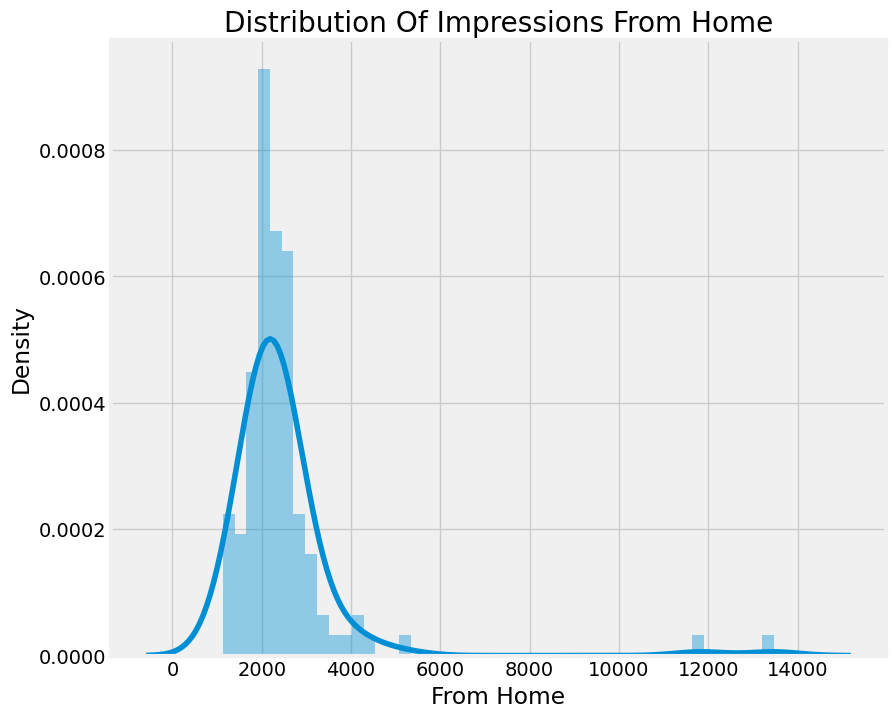

In [ ]:

plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
plt.title("Distribution Of Impressions From Home")
sns.distplot(data["From Home"])
plt.show()



<ipython-input-4-9e40713b0846>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["From Hashtags"])


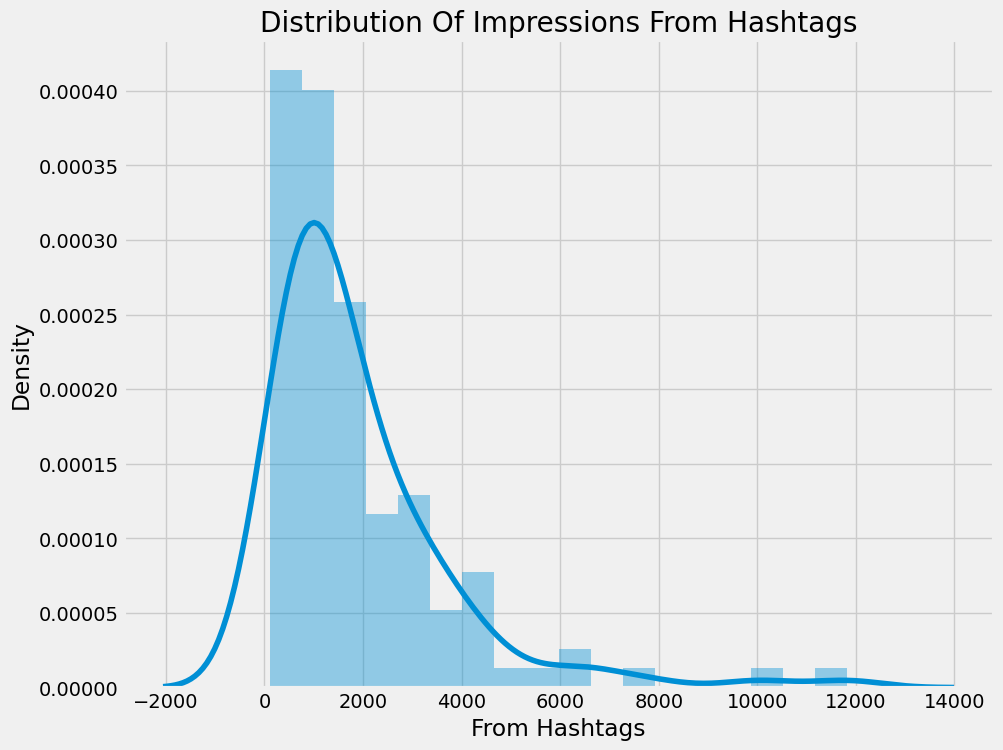

In [ ]:

plt.figure(figsize=(10,8))
plt.title("Distribution Of Impressions From Hashtags")
sns.distplot(data["From Hashtags"])
plt.show()


<ipython-input-5-4e4f0d545ce2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["From Explore"])


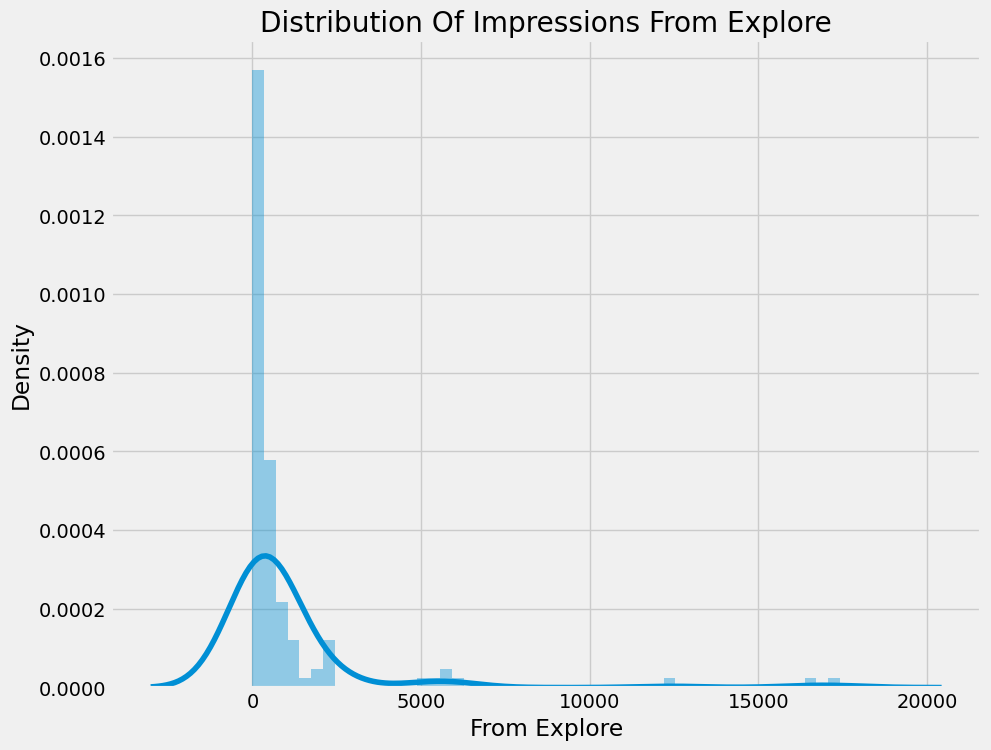

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Distribution Of Impressions From Explore")
sns.distplot(data["From Explore"])
plt.show()



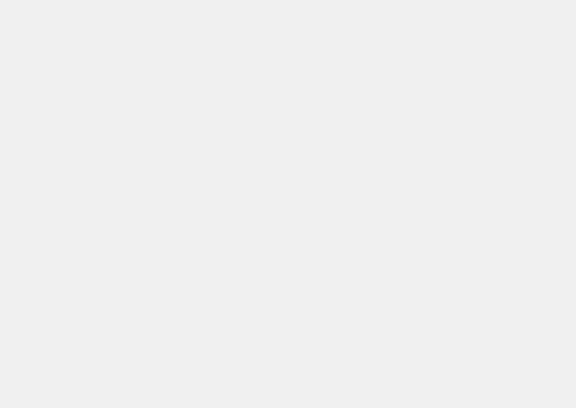

In [ ]:

home=(data["From Home"]).sum()
hashtags=(data["From Hashtags"]).sum()
explore=(data["From Explore"]).sum()
other=(data["From Other"]).sum()

labels=["From Home","From Hashtags","From Explore","From Other"]
values=[home,hashtags,explore,other]
fig=px.pie(data,values=values,names=labels,title="Distribution Of Impression On Instagram Posts From Various Sources",hole=0.5)
plt.axis("off")
fig.show()



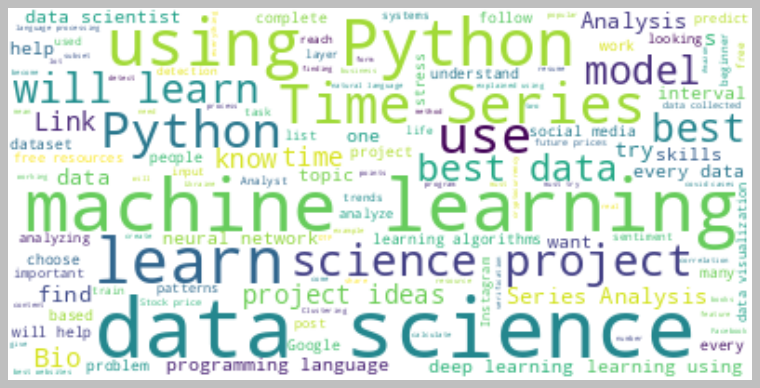

In [ ]:
text=" ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
fig.show()




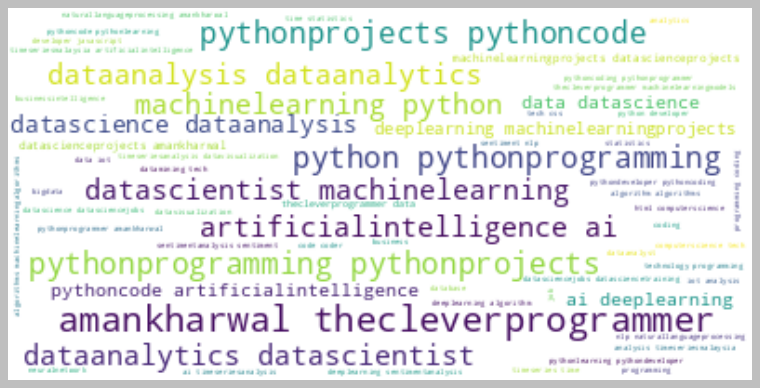

In [ ]:
text=" ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
fig.show()


In [ ]:

figure=px.scatter(data_frame=data ,x="Impressions",
                  y="Likes",size="Likes",
                  trendline="ols",title="Relationship Between T.Impression & Likes")
figure.show()


In [ ]:

figure=px.scatter(data_frame=data,x="Impressions",
                  y="Comments",size="Comments",
                  trendline="ols",title="Relationship Between T.Impression & Comments")
figure.show()



In [ ]:

figure=px.scatter(data_frame=data,x="Impressions",
                  y="Shares",size="Shares",
                  trendline="ols", title="Relationship Between T.Impression & Shares")

figure.show()



In [ ]:
figure=px.scatter(data_frame=data,x="Impressions",
                  y="Saves",size="Saves",
                  trendline="ols", title="Relationship Between T.Impression & Saves")

figure.show()


In [ ]:

correlation=data.corr()
print(correlation["Impressions"].sort_values(ascending=False))



Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


<ipython-input-13-db77808c134a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
conversation_rate=(data["Follows"].sum()/data["Profile Visits"].sum())*100
print(conversation_rate)


41.00265604249668


In [ ]:

figure=px.scatter(data_frame=data, x="Profile Visits",y="Follows",
                  size="Follows",trendline="ols",
                  title="Relationsip Between Profile Visits & Followers Gained")
figure.show()


In [ ]:
#Trainning Block It Trains X By The Following Columns And Y By Impressions Only
#Then Splits The Data To 20% Testing Data After Which It Randomise the testing processing by random state.
x=np.array(data[['Likes','Saves','Comments','Shares','Profile Visits','Follows']])
y=np.array(data["Impressions"])
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
#To the variable fit, it gives trainning data and to score, it gives testing data
model=PassiveAggressiveRegressor()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)


0.4884698197769576

In [ ]:

#Features =[["Likes","Saves","Comments","Shares","Profile Visits","Follows"]]
features=np.array([[282.0,233.0,4.0,9.0,165.0,54.0]])
model.predict(features)

array([7481.06700433])